<a href="https://colab.research.google.com/github/Eddav29/MachineLearning_Ganjil_2024/blob/main/Jobsheet_12_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama
**Eddo Dava Alfarisi**<br>
**2241720232 /**
**07 - TI 3C**

Collab https://colab.research.google.com/drive/14uvp2D0BVLTO9DVU_bEIpeF267IS_rLT?usp=sharing

#Praktikum 1

In [36]:
!pip install gdown


In [37]:
#@title import data set
import gdown
import zipfile
import os

# Unduh file ZIP
url = 'https://drive.google.com/uc?id=1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb'
zip_file = 'dataset.zip'
gdown.download(url, zip_file, quiet=False)

# Ekstrak file ZIP
extract_path = 'dataset'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



Downloading...
From (original): https://drive.google.com/uc?id=1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb
From (redirected): https://drive.google.com/uc?id=1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb&confirm=t&uuid=742f6a02-443a-4a1f-8b37-b057f3c60856
To: /content/dataset.zip
100%|██████████| 233M/233M [00:01<00:00, 187MB/s]


In [38]:
#@title import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Pra Pengolahan Data

Desc :  normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

In [39]:
#@title Pra pengolahan data Training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [40]:
#@title Pra pengolahan data Training
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Pembuatan Model CNN

In [2]:
#@title inisialisasi
cnn = tf.keras.models.Sequential()

In [42]:
#@title Layer konvolusi 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
#@title Layer Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [44]:
#@title Layer Konvolusi 2 dan Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [45]:
#@title flattening , mengconvert ke 1D
cnn.add(tf.keras.layers.Flatten())

In [46]:
#@title Fully connected Layer 1 (input)
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [47]:
#@title Fully connected layer 2 (output)
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [48]:
#@title Compile Model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

menggunakan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

In [49]:
#@title fit CNN dengan 25 epoch
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 266ms/step - accuracy: 0.5708 - loss: 0.6867 - val_accuracy: 0.6740 - val_loss: 0.6097
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 242ms/step - accuracy: 0.6831 - loss: 0.5996 - val_accuracy: 0.7165 - val_loss: 0.5565
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 240ms/step - accuracy: 0.7163 - loss: 0.5623 - val_accuracy: 0.6965 - val_loss: 0.5810
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 241ms/step - accuracy: 0.7322 - loss: 0.5340 - val_accuracy: 0.7410 - val_loss: 0.5338
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 241ms/step - accuracy: 0.7302 - loss: 0.5231 - val_accuracy: 0.7490 - val_loss: 0.5021
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 245ms/step - accuracy: 0.7498 - loss: 0.5036 - val_accuracy: 0.7485 - val_loss: 0.5174
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 256ms/step - accuracy: 0.7550 - loss: 0.4857 - val_accuracy: 0.7615 - val_loss: 0.4964
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 241ms/step - accuracy: 0.7756 - loss: 0.4645 - val

In [64]:
#@title Prediksi menggunakan 1 citra
import numpy as np
from keras.preprocessing import image

# Memuat dan memproses gambar
test_image = image.load_img('dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Prediksi gambar
result = cnn.predict(test_image)
training_set.class_indices  # Melihat indeks kelas (misal: {'cats': 0, 'dogs': 1})

# Menentukan hasil prediksi
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# Menampilkan hasil prediksi
print(f"The predicted class is: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The predicted class is: dog


# Praktikum 2

In [52]:
#@title Load Library
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [53]:
#@title unduh data set CIFAR
train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

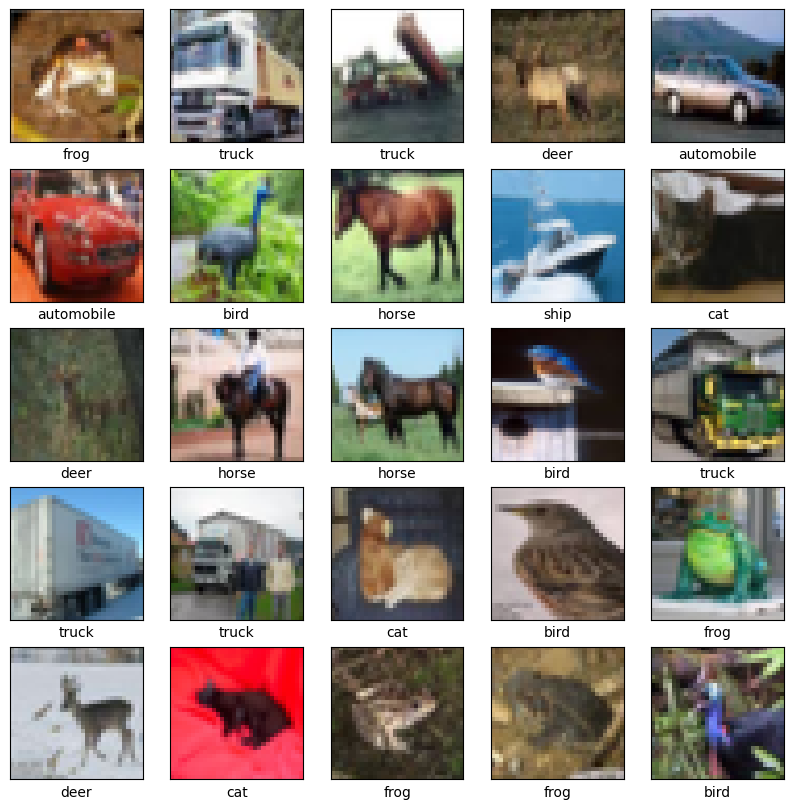

In [54]:
#@title Verifikasi Data(Cek Data)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [56]:
#@title Pembuatan layer konvulusi
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
#@title Menambahkan Layer FUlly Connected
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [59]:
#@title Compile Model CNN
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
#@title Fit model dengan 10 epocb
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3385 - loss: 1.7744 - val_accuracy: 0.5504 - val_loss: 1.2656
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.5652 - loss: 1.2219 - val_accuracy: 0.6041 - val_loss: 1.1343
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.6329 - loss: 1.0371 - val_accuracy: 0.6471 - val_loss: 1.0073
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6745 - loss: 0.9245 - val_accuracy: 0.6688 - val_loss: 0.9604
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7023 - loss: 0.8530 - val_accuracy: 0.6847 - val_loss: 0.9112
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7252 - loss: 0.7897 - val_accuracy: 0.6677 - val_loss: 0.9483
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7400 - loss: 0.7423 - val_accuracy: 0.6972 - val_loss: 0.8792
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.7517 -

313/313 - 4s - 12ms/step - accuracy: 0.7059 - loss: 0.8717


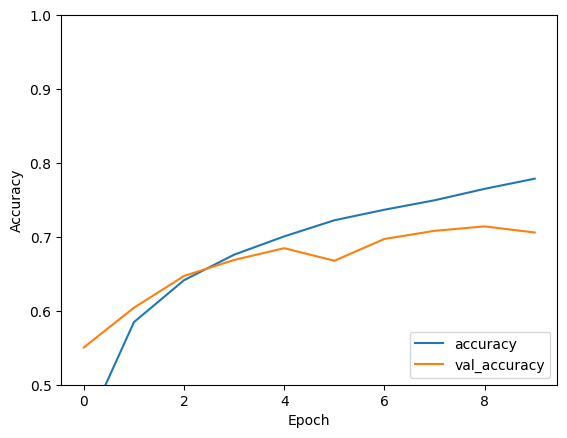

In [61]:
#@title Evaluasi Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [62]:
print(test_acc)

0.7059000134468079


# TUGAS

Meningkatkan akurasi praktkum 2 dengan menambahkan augmentasi data dan menambah dense layer
serta terakhir menambah jumlah epoch disertai dengan callback

Epoch 1/50
782/782 [==============================] - 57s 69ms/step - loss: 1.6633 - accuracy: 0.4183 - val_loss: 1.4457 - val_accuracy: 0.5099 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 55s 70ms/step - loss: 1.2361 - accuracy: 0.5584 - val_loss: 1.1316 - val_accuracy: 0.6023 - lr: 9.0000e-04
Epoch 3/50
782/782 [==============================] - 54s 69ms/step - loss: 1.0790 - accuracy: 0.6170 - val_loss: 1.0002 - val_accuracy: 0.6515 - lr: 8.1000e-04
Epoch 4/50
782/782 [==============================] - 53s 68ms/step - loss: 0.9944 - accuracy: 0.6491 - val_loss: 1.1025 - val_accuracy: 0.6245 - lr: 7.2900e-04
Epoch 5/50
782/782 [==============================] - 53s 68ms/step - loss: 0.9213 - accuracy: 0.6781 - val_loss: 0.9054 - val_accuracy: 0.6947 - lr: 7.2900e-04
Epoch 6/50
782/782 [==============================] - 53s 68ms/step - loss: 0.8786 - accuracy: 0.6915 - val_loss: 0.9682 - val_accuracy: 0.6797 - lr: 6.5610e-04
Epoch 7/50
782/782 [==================

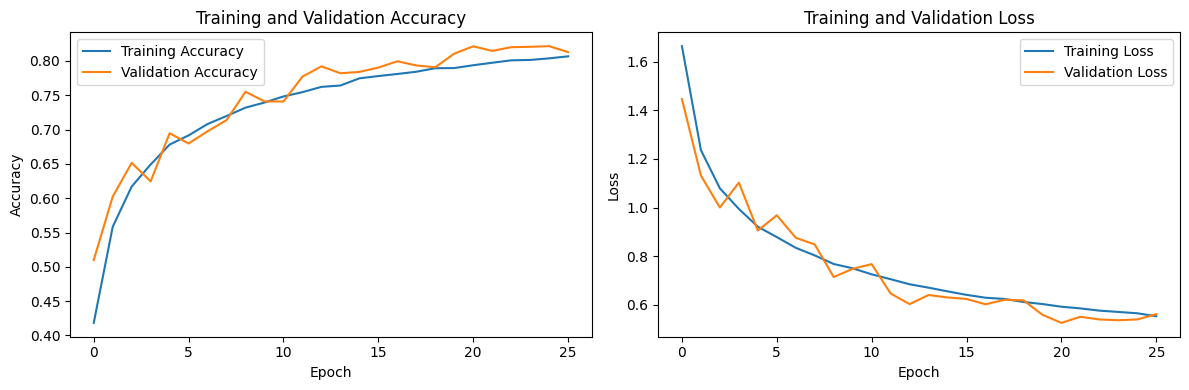

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Data augmentation for training
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Build improved model
model = models.Sequential([
    # Data augmentation layer
    data_augmentation,

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile with learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Add callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )
]

# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=50,
    validation_data=(test_images, test_labels),
    batch_size=64,
    callbacks=callbacks
)

# Plot training results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 3s - loss: 0.5259 - accuracy: 0.8213 - 3s/epoch - 11ms/step
Test accuracy: 0.8213000297546387


Membuat model CNN dengan dataset MNIST
 <br> melatih model Convolutional Neural Network (CNN) untuk mengenali digit pada dataset MNIST. Setelah data di-normalisasi dan dimodifikasi untuk sesuai dengan input CNN, model dilatih menggunakan Adam optimizer dan SparseCategoricalCrossentropy. Setelah training, performa dievaluasi menggunakan data test, menampilkan akurasi, dan memvisualisasikan prediksi dengan warna hijau (benar) atau merah (salah)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


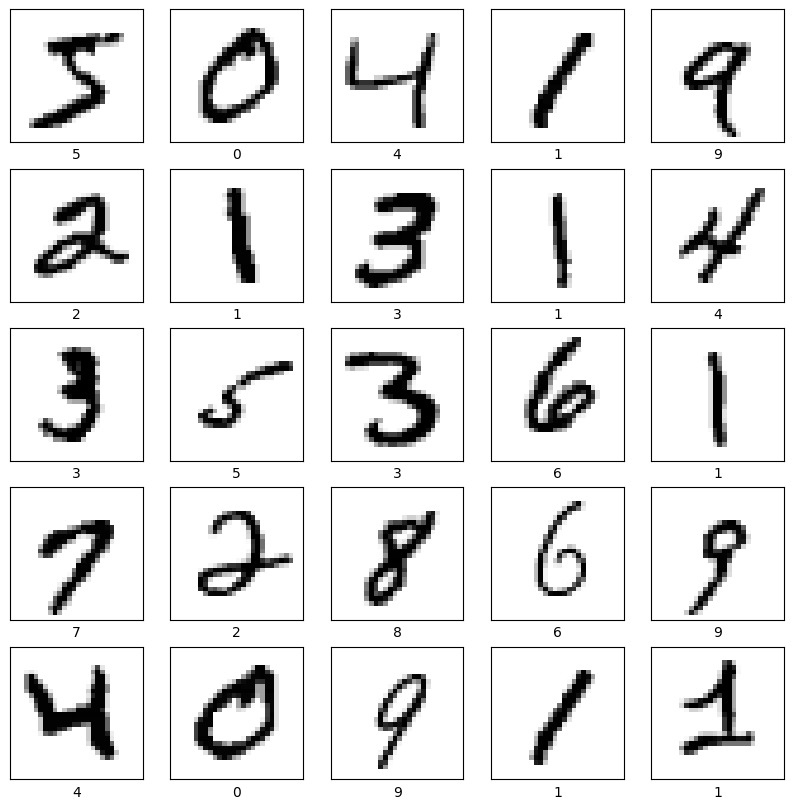

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8708 - loss: 0.4054 - val_accuracy: 0.9869 - val_loss: 0.0406
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9776 - loss: 0.0783 - val_accuracy: 0.9883 - val_loss: 0.0339
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9901 - val_loss: 0.0285
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9864 - loss: 0.0450 - val_accuracy: 0.9918 - val_loss: 0.0243
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9894 - loss: 0.0349 - val_accuracy: 0.9932 - val_loss: 0.0241
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9942 - val_loss: 0.0198
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9925 - loss: 0.0254 - val_accuracy: 0.9919 - val_loss: 0.0264
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9928 -

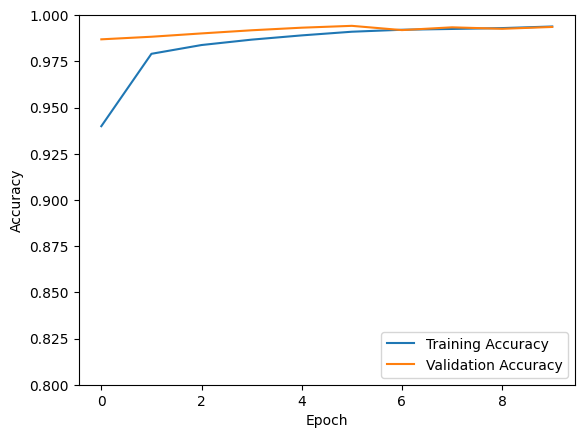

313/313 - 3s - 9ms/step - accuracy: 0.9936 - loss: 0.0233
Test accuracy: 0.9936000108718872
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


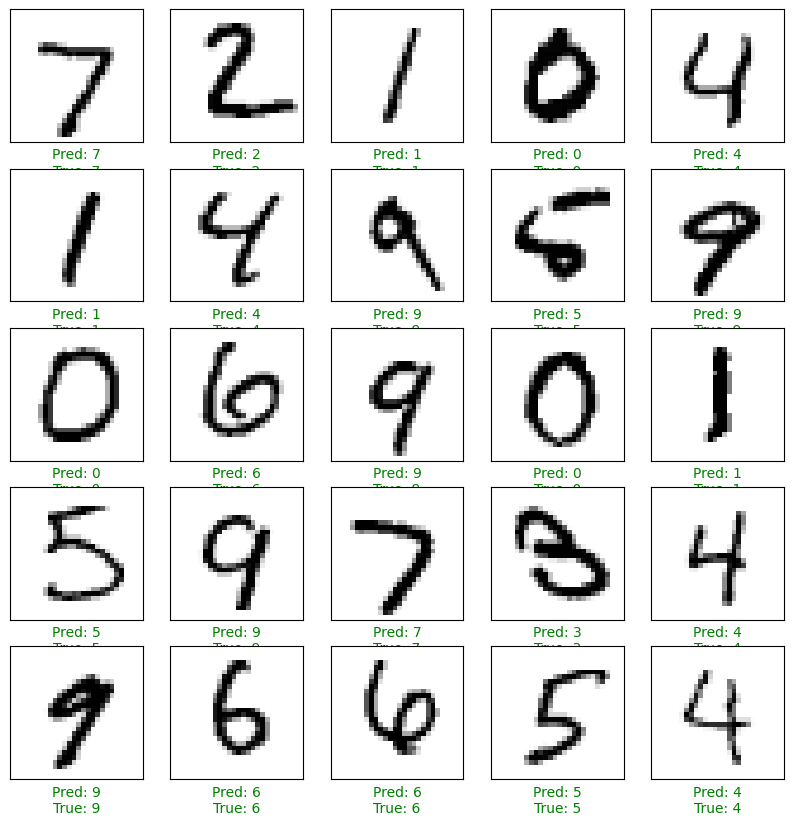

In [67]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions to include channel (for CNN)
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Class names for digits
class_names = [str(i) for i in range(10)]

# Visualize some data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.legend(loc='lower right')
plt.show()

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Predict some images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].squeeze(), cmap=plt.cm.binary)
    color = 'green' if predicted_labels[i] == test_labels[i] else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}",
               color=color)
plt.show()
